In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [13]:
df = pd.read_csv("C:/Users/PRITHVIRAJ KATTIMANI/Data_Analytics_portfolio/Projects/flagship-customer-churn-project/data/Churn_Modelling.csv")

In [14]:
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

In [15]:
y = df["Exited"]
X = df.drop(columns=["Exited"])

In [16]:
X = pd.get_dummies(X, columns=["Geography", "Gender"], drop_first=True)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [18]:
scaler = StandardScaler()

num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [19]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [22]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.808

In [23]:
confusion_matrix(y_test, y_pred)

array([[1540,   53],
       [ 331,   76]], dtype=int64)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [25]:
roc_auc_score(y_test, y_prob)

0.77475626628169

In [26]:
lr_bal = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

lr_bal.fit(X_train, y_train)

y_pred_bal = lr_bal.predict(X_test)
y_prob_bal = lr_bal.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_bal))
roc_auc_score(y_test, y_prob_bal)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1593
           1       0.39      0.70      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



0.7771824212502177

### By applying class-weighted Logistic Regression, churn recall improved from 19% to 70%, significantly reducing missed churners. Although overall accuracy decreased, the model became far more useful for customer retention scenarios where identifying churners is critical.

### Model Comparison Summary
- Baseline LR: High accuracy, poor churn recall
- Balanced LR: Lower accuracy, strong churn recall

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=5,
    random_state=42,
    class_weight="balanced"
)

dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [28]:
# Predictions
dt_pred = dt.predict(X_test)
dt_prob = dt.predict_proba(X_test)[:, 1]

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))
roc_auc_score(y_test, dt_prob)

[[1229  364]
 [  96  311]]
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1593
           1       0.46      0.76      0.57       407

    accuracy                           0.77      2000
   macro avg       0.69      0.77      0.71      2000
weighted avg       0.83      0.77      0.79      2000



0.8378663717646769

### The balanced Decision Tree model provides the best trade-off for churn prediction, achieving high recall (76%) while maintaining strong ROC-AUC (0.84). This makes it well-suited for customer retention use cases where identifying potential churners is more important than raw accuracy.

### Final Model Selection
Decision Tree (class_weight=balanced, max_depth=5) selected based on highest ROC-AUC and churn recall.


In [30]:
import pandas as pd

feat_imp = pd.Series(dt.feature_importances_, index=X_train.columns)
feat_imp.sort_values(ascending=False).head(10)


Age                  0.469310
NumOfProducts        0.346078
IsActiveMember       0.071779
Balance              0.065470
Geography_Germany    0.037601
EstimatedSalary      0.004407
Gender_Male          0.003663
CreditScore          0.001548
Tenure               0.000145
HasCrCard            0.000000
dtype: float64

### Business Insight from Feature Importance

- Older customers are significantly more likely to churn.
- Customers with fewer products show higher churn risk.
- Inactive members are strong churn indicators.
- German customers show higher churn impact compared to other regions.

These insights can be directly used for targeted customer retention stragies.
on strategies.
rategies.
tegies.


<Axes: title={'center': 'Top 10 Feature Importances'}>

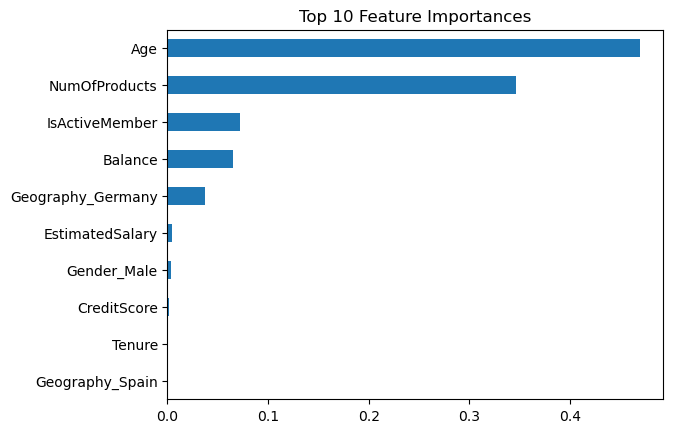

In [31]:
feat_imp.sort_values().tail(10).plot(kind="barh", title="Top 10 Feature Importances")